# Desafio PetLove:
#### Candidato: Pedro Gomes

#### Sobre o desafio:

Seu desafio é participar da equipe de Assinatura, serviço onde o dono do animal programa a entrega de um conjunto de itens dentro de um período customizado, recebendo descontos e brindes exclusivos para assinantes.

A equipe de assinaturas tem como objetivo reduzir a perda de assinantes. O conceito de “Churn” refere-se a perda de qualquer usuário que assinou o serviço de assinatura da Petlove e o cancelou em algum momento após a contratação.

Ao analisar os dados dos últimos meses, apesar de todas as melhorias de usabilidade da plataforma, o churn vem aumentando.

Seu trabalho será apresentar um resultado final com DOIS pontos principais: Quais são os Aprendizados da sua análise dos dados e o que sugere como Próximos Passos.

## Leitura do dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data-test-analytics.csv')

In [3]:
data.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10 00:00:00.000000,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06 00:00:00.000000,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18 00:00:00.000000,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21 00:00:00.000000,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00.000000,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm


## Pré-processamento:

### Dropando dados criptografados:

In [4]:
data=data.drop(columns=['id','name_hash','email_hash','address_hash'])

### Convertendo data de nascimento para idade:

In [5]:
from datetime import datetime

idade=data['birth_date']

In [6]:
def convert_idade(born):
    
    days_in_year = 365.2425    
    age = int((datetime.today() - datetime.fromisoformat(born)).days / days_in_year)
    
    return age

In [7]:
data['birth_date']=list(map(convert_idade, data['birth_date']))


In [8]:
data.rename(columns={'birth_date': 'age'}, inplace=True)
data['age']

0       47
1       81
2       58
3       41
4       62
        ..
9995    60
9996    52
9997    62
9998    64
9999    78
Name: age, Length: 10000, dtype: int64

In [9]:
data.head()

,created_at,updated_at,deleted_at,age,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,47,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,81,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,58,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search
3,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,41,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search
4,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,62,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm


### Podemos transformar algumas entradas de data em dias contados até hoje:

Esse trabalho nos garante trabalhar com valores inteiros e 'fugir' do formato de datas.

In [10]:
def convert_data_dias(date):
    date=str(date)
    
    if date=='nan':
        date=str(datetime.today())
        
    days = int((datetime.today() - datetime.fromisoformat(date)).days)
    
    return days

In [11]:
data['days_of_creaton']=list(map(convert_data_dias, data['created_at']))

In [12]:
data.head()

,created_at,updated_at,deleted_at,age,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,days_of_creaton
0,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,47,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm,1648
1,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,81,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search,780
2,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,58,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search,1078
3,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,41,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search,1308
4,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,62,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm,1351


### Podemos dividir a coluna 'status' para facilitar nas análises futuras e nos plots:

In [13]:
data=pd.get_dummies(data, columns=['status'])

In [14]:
data.head()

,created_at,updated_at,deleted_at,age,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,days_of_creaton,status_active,status_canceled,status_paused
0,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,47,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm,1648,1,0,0
1,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,81,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search,780,0,0,1
2,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,58,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search,1078,1,0,0
3,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,41,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search,1308,1,0,0
4,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,62,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm,1351,1,0,0


### Trabalhando na feature 'deleted_at':

#### A feature 'deleted_at' contém muitos NaNs pelo fato de só haver dados para os clientes que cancelaram a assinatura.

#### Podemos transformar os dados de data 'deleted_at' no valor do mês daquele ano, 0- Nan, 1- janeiro, 2- fevereiro ...

In [15]:
def convert_data_month(date):
    date=str(date)
    
    if date=='nan':
        return 0
    
    month = datetime.fromisoformat(date).month
    return month

In [16]:
data['deleted_at']=list(map(convert_data_month, data['deleted_at']))

### Trabalhando na feature 'created_at':

#### Podemos classificar por mês e descobrir os meses que mais temos cadastros.

In [17]:
data['created_at']=list(map(convert_data_month, data['created_at']))

### Trabalhando na feature de 'updated_at' e 'last_date_purchase':

#### "updated_at - Data da última modificação da assinatura." - Documentação

#### A features 'update_at' pode nos informar o mês que o cliente pausou a assinatura e este dado parece importante.

#### Podemos utilizar a função implementada anteriormente.

In [18]:
data['updated_at']=list(map(convert_data_month, data['updated_at']))

In [19]:
paused_por_mes=data[data['status_paused']==1].groupby(by='updated_at').size()
paused_por_mes

updated_at
1     961
12     10
dtype: int64

##### Este dado parece inconscistente, talvez a 'modificação de assinatura' ocorra todo mês de forma automatica para todos os cadastros ativos e pausados.
##### Mas podemos considerar que ao pausar a assinatura o cliente não fez nenhuma compra posterior e utilizar a data da ultima compra como data do "pause".

In [20]:
data['last_date_purchase']=list(map(convert_data_month, data['last_date_purchase']))

In [21]:
paused_por_mes=data[data['status_paused']==1].groupby(by='last_date_purchase').size()
paused_por_mes

last_date_purchase
1     961
12     10
dtype: int64

<AxesSubplot:xlabel='last_date_purchase'>

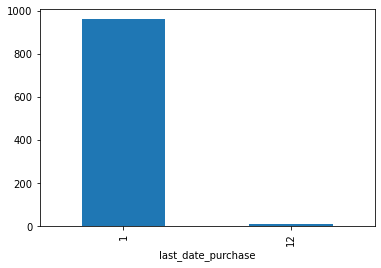

In [22]:
paused_por_mes.plot.bar()

#### Os dados anteriores foram confirmados com estes novos, podemos inferir que a maioria das modificações de status de ativo para pausado ocorrem no inicio do ano.

## Como os dados estão correlacionados:

<AxesSubplot:>

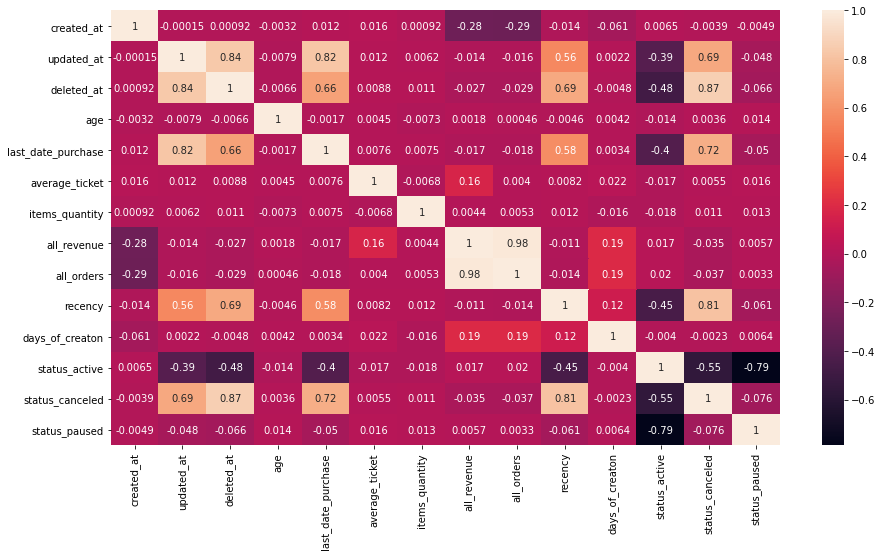

In [23]:
corr_df = data.corr(method='pearson')

plt.pyplot.figure(figsize=(15, 8))
sns.heatmap(corr_df, annot=True)

## Análise por mês:

#### * Dividiremos a análise em duas vertentes: análise em relação aos meses e análise em relação aos estados.
#### Levaremos em consideração idade, canal de marketing e algumas outras features importantes.

### Olhando para os status por mês:

In [24]:
cancelamento_por_mes=data.groupby(by='deleted_at').size()
cancelamento_por_mes

deleted_at
0     9495
1       59
2       57
3       19
4       35
5       31
6       30
7       39
8       38
9       51
10      42
11      45
12      59
dtype: int64

#### Quais meses estão tendo mais pauses na assinatura?

O numero de clientes relacionados ao valor 0 são os não cancelados. (então ignoramos)

<AxesSubplot:xlabel='deleted_at'>

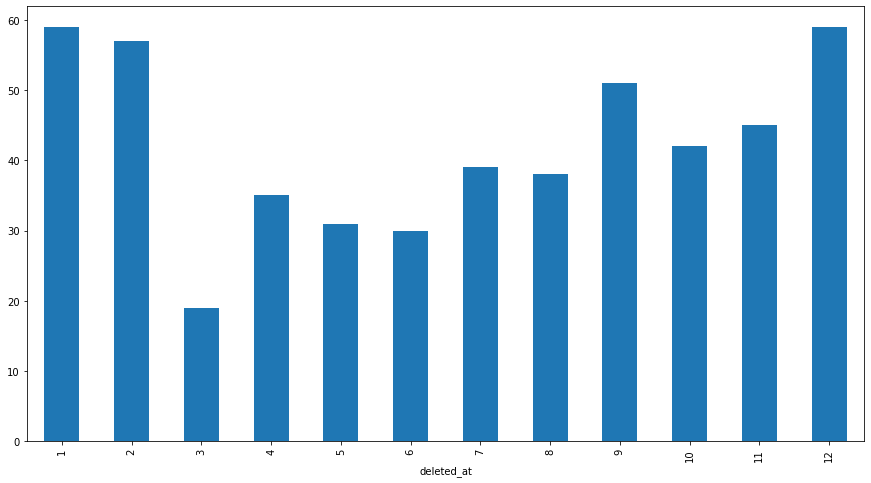

In [25]:
cancelamento_por_mes[1:].plot.bar(figsize=(15, 8))

##### Os meses de dezembro, janeiro e fevereiro estão liderando o rank de maior numero de cancelamento, estes dados também estão relacionados com o numero alto de modificações no status ativo->pausado no mês de janeiro, visto anteriormente.

#### Quais meses estão tendo mais adesão à assinatura?

<AxesSubplot:xlabel='created_at'>

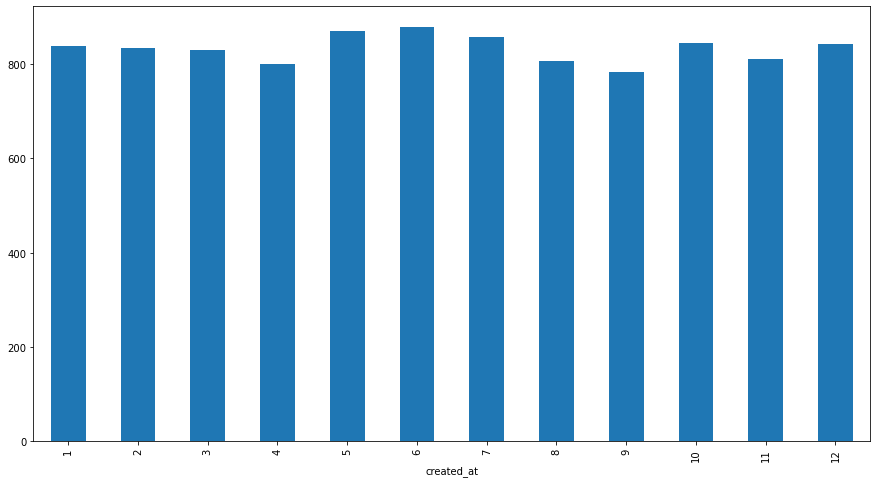

In [26]:
created_por_mes=data.groupby(by='created_at').size()
created_por_mes.plot.bar(figsize=(15, 8))

##### Nossos clientes fazem suas assinaturas o ano todo, apesar de ter um leve aumento no meio do ano, talvez relacionado a um possivel retorno dos clientes que fizeram o cancelamento no fim/inicio do ano.

## Análise por estado:

#### Começaremos analisando a distribuição de clientes totais por estado:

<AxesSubplot:xlabel='state'>

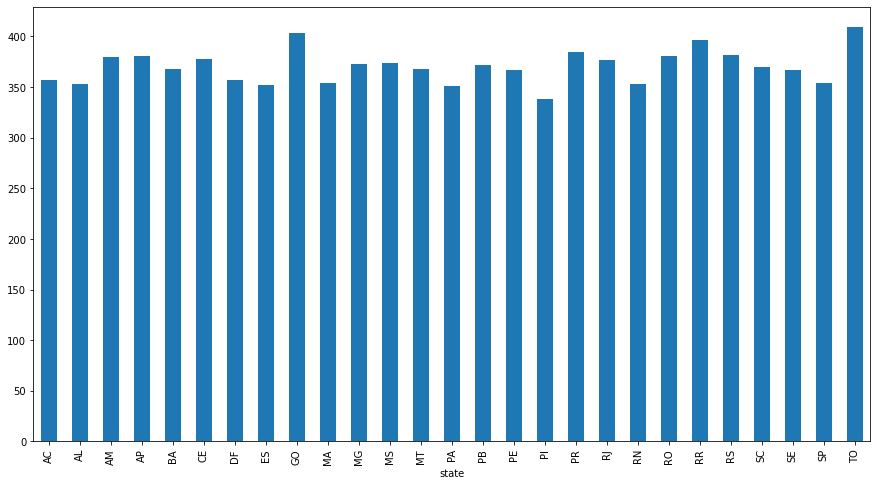

In [27]:
plot1=data.groupby(by='state').size()

plot1.plot.bar(figsize=(15, 8))

#data.groupby(by='state').agg('mean').plot(color='red', linestyle='dashed')

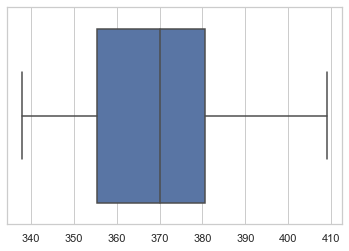

In [28]:

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=plot1)

##### Podemos observar uma distribuição conforme entre todos os estados, sem nenhum destaque positivo ou negativo.

### Podemos olhar para o status por estado e calcular o churn:

In [29]:
status_por_uf=data.groupby(by='state')['status_active','status_canceled','status_paused'].agg('sum')

<ipython-input-29-f3c7a9394247>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  status_por_uf=data.groupby(by='state')['status_active','status_canceled','status_paused'].agg('sum')


<AxesSubplot:xlabel='state'>

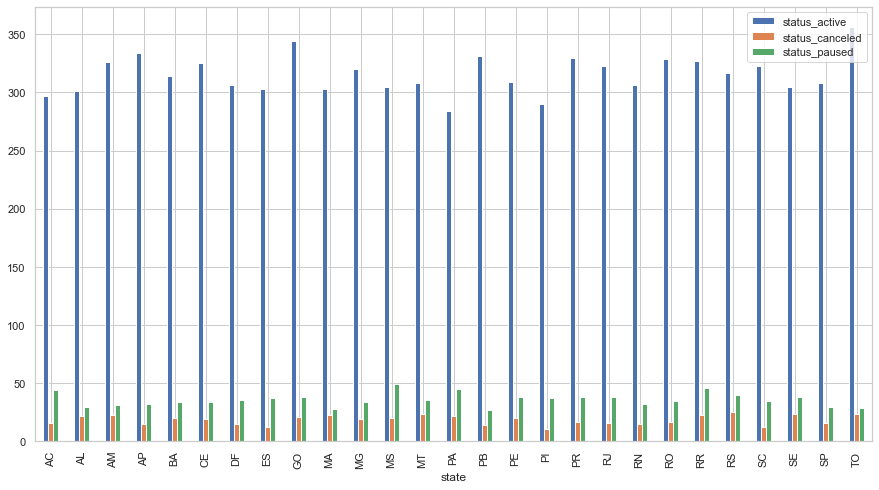

In [30]:
status_por_uf.plot.bar(figsize=(15, 8))

### Churn por estado:

In [31]:
status_por_uf=status_por_uf.assign(churn = np.zeros(len(status_por_uf['status_active'])))

status_por_uf=status_por_uf.assign(mean_churn = np.zeros(len(status_por_uf['status_active'])))

status_por_uf['churn']=status_por_uf['status_canceled']/status_por_uf['status_active']*100

status_por_uf['mean_churn']=status_por_uf['churn'].mean()

In [32]:
status_por_uf.head()

,status_active,status_canceled,status_paused,churn,mean_churn
state,,,,,
AC,297.0,16.0,44.0,5.387205,5.931822
AL,301.0,22.0,30.0,7.308970,5.931822
AM,326.0,23.0,31.0,7.055215,5.931822
AP,334.0,15.0,32.0,4.491018,5.931822
BA,314.0,20.0,34.0,6.369427,5.931822


<AxesSubplot:xlabel='state'>

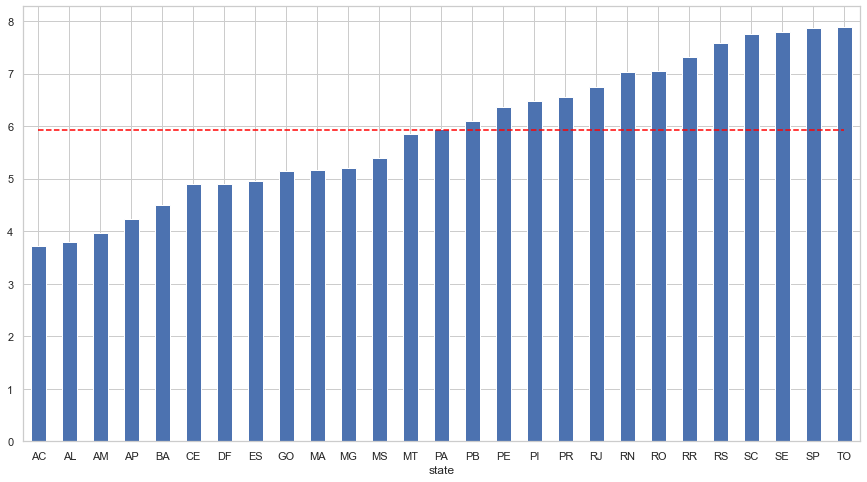

In [33]:
status_por_uf.sort_values(by='churn')['churn'].plot.bar(figsize=(15,8))
status_por_uf['mean_churn'].plot(color='red', linestyle='dashed')


##### É bem nitida a divisão percentual de cancelamento por estado e este parâmetro pode nos apontar os estados com maior índice percentual.

### Observando a idade dos nossos clientes por estado:

<AxesSubplot:xlabel='state'>

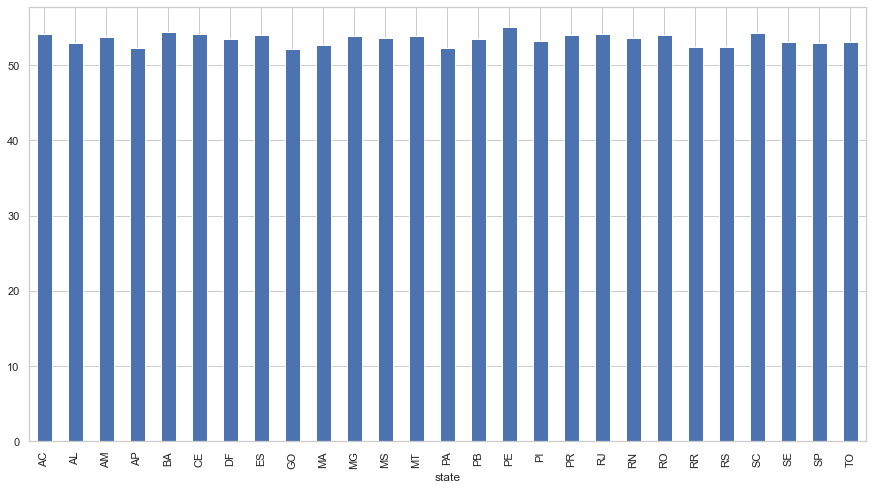

In [34]:
idade_por_uf=data.groupby(by='state')['age'].agg('mean')
idade_por_uf.plot.bar(figsize=(15, 8))

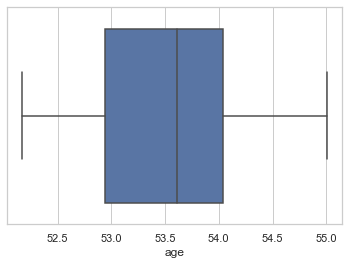

In [48]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=idade_por_uf)

In [35]:
idade_por_uf.agg('mean')

53.43654648343471

##### Bem constante, nos mostra que temos um público bem nixado com a idade média próximo aos 53 anos.

Como sugestão seria interessante os dados de sexo/opção sexual e estado civil para uma melhor identificação deste publico alvo.

### Analisando o ticket médio por estado:

<AxesSubplot:xlabel='state'>

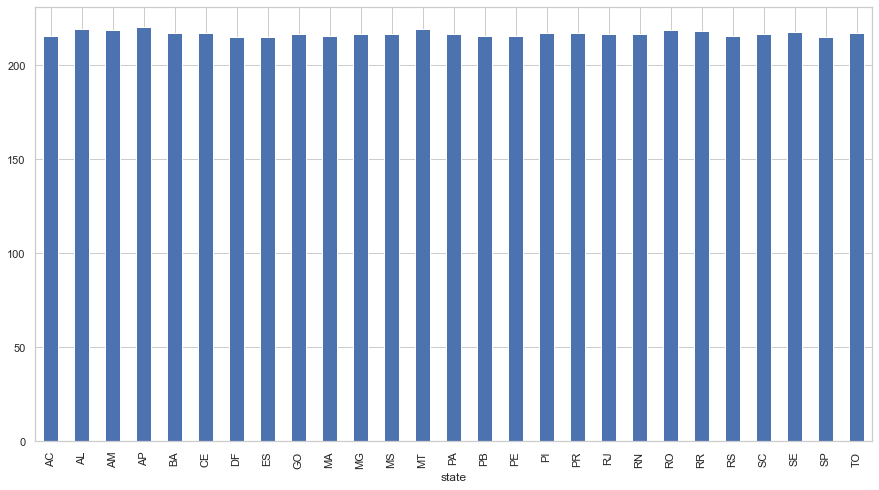

In [36]:
ticket_por_uf=data.groupby(by='state')['average_ticket'].agg('mean')
ticket_por_uf.plot.bar(figsize=(15, 8))

In [37]:
ticket_por_uf.agg('mean')

216.87641716333417

##### Nos retorna valores constantes também, nos mostra que temos um ticket médio que varia bem pouco por estado com valor médio de R$ 216,87 reais.


###  analisando a arrecadação por estados:

<AxesSubplot:xlabel='state'>

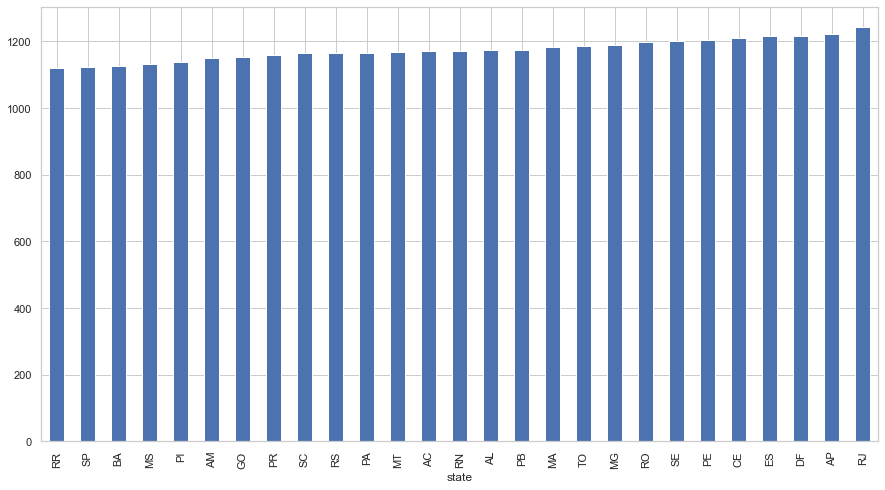

In [38]:
arrecadao_por_uf=(data.groupby(by='state')['all_revenue'].agg('mean')).sort_values()
arrecadao_por_uf.plot.bar(figsize=(15, 8))

### Podemos observar como se dá a distribuição dos clientes pelo marketing source:

In [39]:
data=pd.get_dummies(data, columns=['marketing_source'])

In [57]:
colunas_=['marketing_source_crm','marketing_source_direct','marketing_source_none','marketing_source_organic_search','marketing_source_paid_search','marketing_source_telegram_whatsapp']

In [58]:
marketing_source_por_uf=data.groupby(by='state')[colunas_].agg('sum')

#### Os dados podem ser ordenados pelo churn a fim de visualizar uma relação de dependência

In [42]:
marketing_source_por_uf['churn']=status_por_uf['churn']

In [43]:
marketing_source_por_uf.sort_values(by='churn').head()

,marketing_source_crm,marketing_source_direct,marketing_source_none,marketing_source_organic_search,marketing_source_paid_search,marketing_source_telegram_whatsapp,churn
state,,,,,,,
SC,42,79,21,137,51,40,3.715170
PI,27,79,15,130,54,33,3.793103
ES,30,76,21,134,54,37,3.960396
PB,40,89,24,120,61,38,4.229607
AP,56,89,19,135,49,33,4.491018


<AxesSubplot:xlabel='state'>

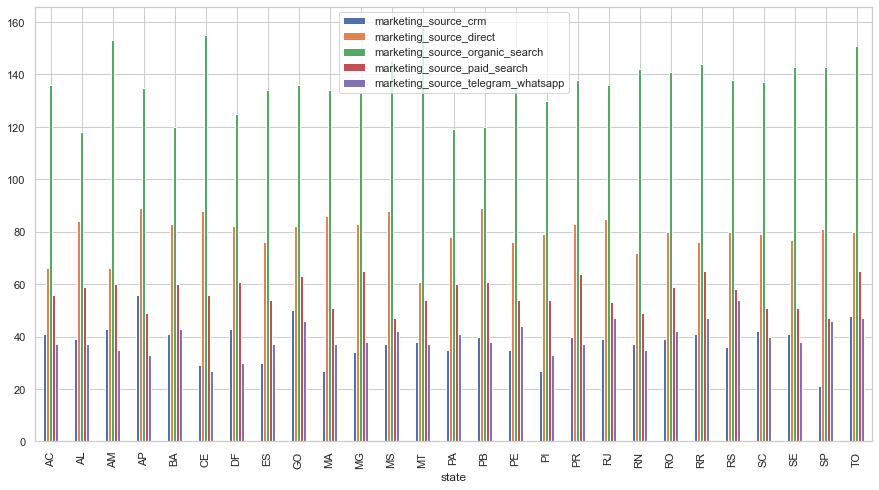

In [44]:
marketing_source_por_uf=marketing_source_por_uf.drop(columns=['churn', 'marketing_source_none'])
marketing_source_por_uf.plot.bar(figsize=(15, 8))

#### Não conseguimos observar uma relação linear de dependência, mas podemos tentar analisar os valores absolutos (valor/total) de cada seguimento por estado.
#### Também podemos olhar para os dados em relação apenas aos que cancelaram a assinatura.

In [70]:
deleted_por_mkt=data[data['status_canceled']==1].groupby(by=colunas_).sum()
deleted_por_mkt

created_at  \
marketing_source_crm marketing_source_direct marketing_source_none marketing_source_organic_search marketing_source_paid_search marketing_source_telegram_whatsapp               
0                    0                       0                     0                               0                            1                                          435   
                                                                                                   1                            0                                          450   
                                                                   1                               0                            0                                         1233   
                                             1                     0                               0                            0                                          214   
                     1                       0                     0                               0                            0                                          650   
1                    0                       0                     0                               0                            0                                          262   

                                                                                                                                                                    updated_at  \
marketing_source_crm marketing_source_direct marketing_source_none marketing_source_organic_search marketing_source_paid_search marketing_source_telegram_whatsapp               
0                    0                       0                     0                               0                            1                                          388   
                                                                                                   1                            0                                          452   
                                                                   1                               0                            0                                         1371   
                                             1                     0                               0                            0                                          218   
                     1                       0                     0                               0                            0                                          627   
1                    0                       0                     0                               0                            0                                          308   

                                                                                                                                                                    deleted_at  \
marketing_source_crm marketing_source_direct marketing_source_none marketing_source_organic_search marketing_source_paid_search marketing_source_telegram_whatsapp               
0                    0                       0                     0                               0                            1                                          388   
                                                                                                   1                            0                                          452   
                                                                   1                               0                            0                                         1371   
                                             1                     0                               0                            0                                          218   
                     1                       0                     0                               0                            0                                          627   
1                    0                       0                     0

In [45]:
aux=marketing_source_por_uf.keys()
aux

Index(['marketing_source_crm', 'marketing_source_direct',
       'marketing_source_organic_search', 'marketing_source_paid_search',
       'marketing_source_telegram_whatsapp'],
      dtype='object')

In [46]:
marketing_source_por_uf=marketing_source_por_uf.assign(total = np.zeros(len(marketing_source_por_uf['marketing_source_crm'])))
    

In [ ]:
marketing_source_por_uf.info()

In [ ]:
marketing_source_por_uf.head()

In [ ]:
status_por_uf=status_por_uf.assign(churn = np.zeros(len(status_por_uf['status_active'])))

status_por_uf=status_por_uf.assign(mean_churn = np.zeros(len(status_por_uf['status_active'])))

status_por_uf['churn']=status_por_uf['status_canceled']/status_por_uf['status_active']*100

status_por_uf['mean_churn']=status_por_uf['churn'].mean()

### Podemos olhar para dados geolocalizados:

In [49]:
!pip install geopy

In [50]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [51]:
locator=Nominatim(user_agent="myGeocoder")
#location = locator.geocode("boa viagem, recife, pernambuco")

geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [ ]:
location.point

In [52]:
data['address']=data['city']+','+data['state']

In [54]:
data2['address_geo']=data.groupby(by='address')['address'].apply(geocode)

KeyboardInterrupt: 

In [ ]:
ihu=data.groupby(by='address')['address']
ihu.head()